# Load demand forecast for NewYork using ARIMA Model

## `Scrape the data from www.nyiso.com`

### Import libraries

In [6]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
import re
import os
import os.path
from os import listdir
from os.path import isfile, join
import zipfile
import pandas as pd 

### Set the download folder

In [8]:
CURRENT_DIR = os.getcwd()
directory = CURRENT_DIR + "/" + "scraped_data"
if not os.path.exists(directory):
    os.makedirs(directory)

### Download all zip files in the link

In [28]:
url = "http://mis.nyiso.com/public/P-58Blist.htm"
html_page = urlopen(url).read()
soup = BeautifulSoup(html_page, "lxml")
for link in soup.findAll('a'):
    temp = link.get('href')
    if temp.endswith('.zip'):
        file_name = temp.replace("_csv.zip", "")
        file_name = temp.replace("csv/pal/", "")
        print(file_name)
        full_url = "http://mis.nyiso.com/public/"+temp
        filename = os.path.join(directory, file_name)
        print("Downloading {}...".format(filename) )
        urlretrieve(full_url, filename)
        print("Done.")

### Read and unzip the files

In [4]:
onlyfiles = [f for f in listdir(directory) if isfile(join(directory, f))]

In [9]:
unzip_folder = directory + "/" + "unzipped_data"
if not os.path.exists(unzip_folder):
    os.makedirs(unzip_folder)

In [32]:
for file in onlyfiles:
    path_to_zip_file = directory + "/" + file
    zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
    zip_ref.extractall(unzip_folder)
    zip_ref.close()

### Read each file, convert it to time series data

**`Sample`**

In [17]:
sample = pd.read_csv(r"C:\Users\sleeba\OneDrive\florian_steinke\new_york_energy_monitor\scraped_data\unzipped_data\20010526pal.csv",
                    header = 0)
print(sample.head())

            Time Stamp Time Zone    Name     PTID  Load
0  05/26/2001 00:00:00       EDT  CAPITL  61757.0   985
1  05/26/2001 00:00:00       EDT  CENTRL  61754.0  1461
2  05/26/2001 00:00:00       EDT  DUNWOD  61760.0   443
3  05/26/2001 00:00:00       EDT  GENESE  61753.0   830
4  05/26/2001 00:00:00       EDT  HUD VL  61758.0   970


In [32]:
modify_sample = sample[["Time Stamp", "Name", "Load"]]
print(modify_sample.head())

            Time Stamp    Name  Load
0  05/26/2001 00:00:00  CAPITL   985
1  05/26/2001 00:00:00  CENTRL  1461
2  05/26/2001 00:00:00  DUNWOD   443
3  05/26/2001 00:00:00  GENESE   830
4  05/26/2001 00:00:00  HUD VL   970


In [33]:
modify_sample = modify_sample.pivot(index='Time Stamp', columns='Name', values='Load').reset_index()
print(modify.head())

Name           Time Stamp  CAPITL  CENTRL  DUNWOD  GENESE  HUD VL  MHK VL  \
0     05/26/2001 00:00:00     985    1461     443     830     970     623   
1     05/26/2001 00:00:50     995    1455     455     818     990     614   
2     05/26/2001 00:05:20     980    1447     441     816     980     605   
3     05/26/2001 00:06:50     947    1417     431     800     962     611   
4     05/26/2001 00:11:50     946    1429     439     798     969     610   

Name  MILLWD  N.Y.C._LONGIL  NORTH  WEST  
0        166           6217    659  1505  
1        150           6174    636  1474  
2        158           6158    649  1484  
3        153           6140    646  1515  
4        148           6100    647  1465  


### Do this transformation to all the files in unzipped folder and merge to a single file 

In [10]:
csv_files = [f for f in listdir(unzip_folder) if isfile(join(unzip_folder, f))]

In [11]:
len(csv_files)

5802

In [12]:
final_df = pd.DataFrame()
for i, file in enumerate(csv_files):
    try:
        df = pd.read_csv(unzip_folder + "/" + file, header=0)
        df = df[["Time Stamp", "Name", "Load"]]
        df = df.pivot(index='Time Stamp', columns='Name', values='Load').reset_index()
        final_df = final_df.append(df, ignore_index=True)
        print("{} of {} is done".format(i,len(csv_files)))
    except:
        print(i)
        continue

0 of 5802 is done
1 of 5802 is done
2 of 5802 is done
3 of 5802 is done
4 of 5802 is done
5 of 5802 is done
6 of 5802 is done
7 of 5802 is done
8 of 5802 is done
9 of 5802 is done
10 of 5802 is done
11 of 5802 is done
12 of 5802 is done
13 of 5802 is done
14 of 5802 is done
15 of 5802 is done
16 of 5802 is done
17 of 5802 is done
18 of 5802 is done
19 of 5802 is done
20 of 5802 is done
21 of 5802 is done
22 of 5802 is done
23 of 5802 is done
24 of 5802 is done
25 of 5802 is done
26 of 5802 is done
27 of 5802 is done
28 of 5802 is done
29 of 5802 is done
30 of 5802 is done
31 of 5802 is done
32 of 5802 is done
33 of 5802 is done
34 of 5802 is done
35 of 5802 is done
36 of 5802 is done
37 of 5802 is done
38 of 5802 is done
39 of 5802 is done
40 of 5802 is done
41 of 5802 is done
42 of 5802 is done
43 of 5802 is done
44 of 5802 is done
45 of 5802 is done
46 of 5802 is done
47 of 5802 is done
48 of 5802 is done
49 of 5802 is done
50 of 5802 is done
51 of 5802 is done
52 of 5802 is done
53 

421 of 5802 is done
422 of 5802 is done
423 of 5802 is done
424 of 5802 is done
425 of 5802 is done
426 of 5802 is done
427 of 5802 is done
428 of 5802 is done
429 of 5802 is done
430 of 5802 is done
431 of 5802 is done
432 of 5802 is done
433 of 5802 is done
434 of 5802 is done
435 of 5802 is done
436 of 5802 is done
437 of 5802 is done
438 of 5802 is done
439 of 5802 is done
440 of 5802 is done
441 of 5802 is done
442 of 5802 is done
443 of 5802 is done
444 of 5802 is done
445 of 5802 is done
446 of 5802 is done
447 of 5802 is done
448 of 5802 is done
449 of 5802 is done
450 of 5802 is done
451 of 5802 is done
452 of 5802 is done
453 of 5802 is done
454 of 5802 is done
455 of 5802 is done
456 of 5802 is done
457 of 5802 is done
458 of 5802 is done
459 of 5802 is done
460 of 5802 is done
461 of 5802 is done
462 of 5802 is done
463 of 5802 is done
464 of 5802 is done
465 of 5802 is done
466 of 5802 is done
467 of 5802 is done
468 of 5802 is done
469 of 5802 is done
470 of 5802 is done


833 of 5802 is done
834 of 5802 is done
835 of 5802 is done
836 of 5802 is done
837 of 5802 is done
838 of 5802 is done
839 of 5802 is done
840 of 5802 is done
841 of 5802 is done
842 of 5802 is done
843 of 5802 is done
844 of 5802 is done
845 of 5802 is done
846 of 5802 is done
847 of 5802 is done
848 of 5802 is done
849 of 5802 is done
850 of 5802 is done
851 of 5802 is done
852 of 5802 is done
853 of 5802 is done
854 of 5802 is done
855 of 5802 is done
856 of 5802 is done
857 of 5802 is done
858 of 5802 is done
859 of 5802 is done
860 of 5802 is done
861 of 5802 is done
862 of 5802 is done
863 of 5802 is done
864 of 5802 is done
865 of 5802 is done
866 of 5802 is done
867 of 5802 is done
868 of 5802 is done
869 of 5802 is done
870 of 5802 is done
871 of 5802 is done
872 of 5802 is done
873 of 5802 is done
874 of 5802 is done
875 of 5802 is done
876 of 5802 is done
877 of 5802 is done
878 of 5802 is done
879 of 5802 is done
880 of 5802 is done
881 of 5802 is done
882 of 5802 is done


1233 of 5802 is done
1234 of 5802 is done
1235 of 5802 is done
1236 of 5802 is done
1237 of 5802 is done
1238 of 5802 is done
1239 of 5802 is done
1240 of 5802 is done
1241 of 5802 is done
1242 of 5802 is done
1243 of 5802 is done
1244 of 5802 is done
1245 of 5802 is done
1246 of 5802 is done
1247 of 5802 is done
1248 of 5802 is done
1249 of 5802 is done
1250 of 5802 is done
1251 of 5802 is done
1252 of 5802 is done
1253 of 5802 is done
1254
1255 of 5802 is done
1256 of 5802 is done
1257 of 5802 is done
1258 of 5802 is done
1259 of 5802 is done
1260 of 5802 is done
1261 of 5802 is done
1262 of 5802 is done
1263 of 5802 is done
1264 of 5802 is done
1265 of 5802 is done
1266 of 5802 is done
1267 of 5802 is done
1268 of 5802 is done
1269 of 5802 is done
1270 of 5802 is done
1271 of 5802 is done
1272 of 5802 is done
1273 of 5802 is done
1274 of 5802 is done
1275 of 5802 is done
1276 of 5802 is done
1277 of 5802 is done
1278 of 5802 is done
1279 of 5802 is done
1280 of 5802 is done
1281 of 

2018 of 5802 is done
2019 of 5802 is done
2020 of 5802 is done
2021 of 5802 is done
2022 of 5802 is done
2023 of 5802 is done
2024 of 5802 is done
2025 of 5802 is done
2026 of 5802 is done
2027 of 5802 is done
2028 of 5802 is done
2029 of 5802 is done
2030 of 5802 is done
2031 of 5802 is done
2032 of 5802 is done
2033 of 5802 is done
2034 of 5802 is done
2035 of 5802 is done
2036 of 5802 is done
2037 of 5802 is done
2038 of 5802 is done
2039 of 5802 is done
2040 of 5802 is done
2041 of 5802 is done
2042 of 5802 is done
2043 of 5802 is done
2044 of 5802 is done
2045 of 5802 is done
2046 of 5802 is done
2047 of 5802 is done
2048 of 5802 is done
2049 of 5802 is done
2050 of 5802 is done
2051 of 5802 is done
2052 of 5802 is done
2053 of 5802 is done
2054 of 5802 is done
2055 of 5802 is done
2056 of 5802 is done
2057 of 5802 is done
2058 of 5802 is done
2059 of 5802 is done
2060 of 5802 is done
2061 of 5802 is done
2062 of 5802 is done
2063 of 5802 is done
2064 of 5802 is done
2065 of 5802 

2409 of 5802 is done
2410 of 5802 is done
2411 of 5802 is done
2412 of 5802 is done
2413 of 5802 is done
2414 of 5802 is done
2415 of 5802 is done
2416 of 5802 is done
2417 of 5802 is done
2418 of 5802 is done
2419 of 5802 is done
2420 of 5802 is done
2421 of 5802 is done
2422 of 5802 is done
2423 of 5802 is done
2424 of 5802 is done
2425 of 5802 is done
2426 of 5802 is done
2427 of 5802 is done
2428 of 5802 is done
2429 of 5802 is done
2430 of 5802 is done
2431 of 5802 is done
2432 of 5802 is done
2433 of 5802 is done
2434 of 5802 is done
2435 of 5802 is done
2436 of 5802 is done
2437 of 5802 is done
2438 of 5802 is done
2439 of 5802 is done
2440 of 5802 is done
2441 of 5802 is done
2442 of 5802 is done
2443 of 5802 is done
2444 of 5802 is done
2445 of 5802 is done
2446 of 5802 is done
2447 of 5802 is done
2448 of 5802 is done
2449 of 5802 is done
2450 of 5802 is done
2451 of 5802 is done
2452 of 5802 is done
2453 of 5802 is done
2454 of 5802 is done
2455 of 5802 is done
2456 of 5802 

2800 of 5802 is done
2801 of 5802 is done
2802 of 5802 is done
2803 of 5802 is done
2804 of 5802 is done
2805 of 5802 is done
2806 of 5802 is done
2807 of 5802 is done
2808 of 5802 is done
2809 of 5802 is done
2810 of 5802 is done
2811 of 5802 is done
2812 of 5802 is done
2813 of 5802 is done
2814 of 5802 is done
2815 of 5802 is done
2816 of 5802 is done
2817 of 5802 is done
2818 of 5802 is done
2819 of 5802 is done
2820 of 5802 is done
2821 of 5802 is done
2822 of 5802 is done
2823 of 5802 is done
2824 of 5802 is done
2825 of 5802 is done
2826 of 5802 is done
2827 of 5802 is done
2828 of 5802 is done
2829 of 5802 is done
2830 of 5802 is done
2831 of 5802 is done
2832 of 5802 is done
2833 of 5802 is done
2834 of 5802 is done
2835 of 5802 is done
2836 of 5802 is done
2837 of 5802 is done
2838 of 5802 is done
2839 of 5802 is done
2840 of 5802 is done
2841 of 5802 is done
2842 of 5802 is done
2843 of 5802 is done
2844 of 5802 is done
2845 of 5802 is done
2846 of 5802 is done
2847 of 5802 

3191 of 5802 is done
3192 of 5802 is done
3193 of 5802 is done
3194 of 5802 is done
3195 of 5802 is done
3196 of 5802 is done
3197 of 5802 is done
3198 of 5802 is done
3199 of 5802 is done
3200 of 5802 is done
3201 of 5802 is done
3202 of 5802 is done
3203 of 5802 is done
3204 of 5802 is done
3205 of 5802 is done
3206 of 5802 is done
3207 of 5802 is done
3208 of 5802 is done
3209 of 5802 is done
3210 of 5802 is done
3211 of 5802 is done
3212 of 5802 is done
3213 of 5802 is done
3214 of 5802 is done
3215 of 5802 is done
3216 of 5802 is done
3217 of 5802 is done
3218 of 5802 is done
3219 of 5802 is done
3220 of 5802 is done
3221 of 5802 is done
3222 of 5802 is done
3223 of 5802 is done
3224 of 5802 is done
3225 of 5802 is done
3226 of 5802 is done
3227 of 5802 is done
3228 of 5802 is done
3229 of 5802 is done
3230 of 5802 is done
3231 of 5802 is done
3232 of 5802 is done
3233 of 5802 is done
3234 of 5802 is done
3235 of 5802 is done
3236 of 5802 is done
3237 of 5802 is done
3238 of 5802 

3582 of 5802 is done
3583 of 5802 is done
3584 of 5802 is done
3585 of 5802 is done
3586 of 5802 is done
3587 of 5802 is done
3588 of 5802 is done
3589 of 5802 is done
3590 of 5802 is done
3591 of 5802 is done
3592 of 5802 is done
3593 of 5802 is done
3594 of 5802 is done
3595 of 5802 is done
3596 of 5802 is done
3597 of 5802 is done
3598 of 5802 is done
3599 of 5802 is done
3600 of 5802 is done
3601 of 5802 is done
3602 of 5802 is done
3603 of 5802 is done
3604 of 5802 is done
3605 of 5802 is done
3606 of 5802 is done
3607 of 5802 is done
3608 of 5802 is done
3609 of 5802 is done
3610 of 5802 is done
3611 of 5802 is done
3612 of 5802 is done
3613 of 5802 is done
3614 of 5802 is done
3615 of 5802 is done
3616 of 5802 is done
3617 of 5802 is done
3618 of 5802 is done
3619 of 5802 is done
3620 of 5802 is done
3621 of 5802 is done
3622 of 5802 is done
3623 of 5802 is done
3624 of 5802 is done
3625 of 5802 is done
3626 of 5802 is done
3627 of 5802 is done
3628 of 5802 is done
3629 of 5802 

3973 of 5802 is done
3974 of 5802 is done
3975 of 5802 is done
3976 of 5802 is done
3977 of 5802 is done
3978 of 5802 is done
3979 of 5802 is done
3980 of 5802 is done
3981 of 5802 is done
3982 of 5802 is done
3983 of 5802 is done
3984 of 5802 is done
3985 of 5802 is done
3986 of 5802 is done
3987 of 5802 is done
3988 of 5802 is done
3989 of 5802 is done
3990 of 5802 is done
3991 of 5802 is done
3992 of 5802 is done
3993 of 5802 is done
3994 of 5802 is done
3995 of 5802 is done
3996 of 5802 is done
3997 of 5802 is done
3998 of 5802 is done
3999 of 5802 is done
4000 of 5802 is done
4001 of 5802 is done
4002 of 5802 is done
4003 of 5802 is done
4004 of 5802 is done
4005 of 5802 is done
4006 of 5802 is done
4007 of 5802 is done
4008 of 5802 is done
4009 of 5802 is done
4010 of 5802 is done
4011 of 5802 is done
4012 of 5802 is done
4013 of 5802 is done
4014 of 5802 is done
4015 of 5802 is done
4016 of 5802 is done
4017 of 5802 is done
4018 of 5802 is done
4019 of 5802 is done
4020 of 5802 

4364 of 5802 is done
4365 of 5802 is done
4366 of 5802 is done
4367 of 5802 is done
4368 of 5802 is done
4369 of 5802 is done
4370 of 5802 is done
4371 of 5802 is done
4372 of 5802 is done
4373 of 5802 is done
4374 of 5802 is done
4375 of 5802 is done
4376 of 5802 is done
4377 of 5802 is done
4378 of 5802 is done
4379 of 5802 is done
4380 of 5802 is done
4381 of 5802 is done
4382 of 5802 is done
4383 of 5802 is done
4384 of 5802 is done
4385 of 5802 is done
4386 of 5802 is done
4387 of 5802 is done
4388 of 5802 is done
4389 of 5802 is done
4390 of 5802 is done
4391 of 5802 is done
4392 of 5802 is done
4393 of 5802 is done
4394 of 5802 is done
4395 of 5802 is done
4396 of 5802 is done
4397 of 5802 is done
4398 of 5802 is done
4399 of 5802 is done
4400 of 5802 is done
4401 of 5802 is done
4402 of 5802 is done
4403 of 5802 is done
4404 of 5802 is done
4405 of 5802 is done
4406 of 5802 is done
4407 of 5802 is done
4408 of 5802 is done
4409 of 5802 is done
4410 of 5802 is done
4411 of 5802 

4755 of 5802 is done
4756 of 5802 is done
4757 of 5802 is done
4758 of 5802 is done
4759 of 5802 is done
4760 of 5802 is done
4761 of 5802 is done
4762 of 5802 is done
4763 of 5802 is done
4764 of 5802 is done
4765 of 5802 is done
4766 of 5802 is done
4767 of 5802 is done
4768 of 5802 is done
4769 of 5802 is done
4770 of 5802 is done
4771 of 5802 is done
4772 of 5802 is done
4773 of 5802 is done
4774 of 5802 is done
4775 of 5802 is done
4776 of 5802 is done
4777 of 5802 is done
4778 of 5802 is done
4779 of 5802 is done
4780 of 5802 is done
4781 of 5802 is done
4782 of 5802 is done
4783 of 5802 is done
4784 of 5802 is done
4785 of 5802 is done
4786 of 5802 is done
4787 of 5802 is done
4788 of 5802 is done
4789 of 5802 is done
4790 of 5802 is done
4791 of 5802 is done
4792 of 5802 is done
4793 of 5802 is done
4794 of 5802 is done
4795 of 5802 is done
4796 of 5802 is done
4797 of 5802 is done
4798 of 5802 is done
4799 of 5802 is done
4800 of 5802 is done
4801 of 5802 is done
4802 of 5802 

5146 of 5802 is done
5147 of 5802 is done
5148 of 5802 is done
5149 of 5802 is done
5150 of 5802 is done
5151 of 5802 is done
5152 of 5802 is done
5153 of 5802 is done
5154 of 5802 is done
5155 of 5802 is done
5156 of 5802 is done
5157 of 5802 is done
5158 of 5802 is done
5159 of 5802 is done
5160 of 5802 is done
5161 of 5802 is done
5162 of 5802 is done
5163 of 5802 is done
5164 of 5802 is done
5165 of 5802 is done
5166 of 5802 is done
5167 of 5802 is done
5168 of 5802 is done
5169 of 5802 is done
5170 of 5802 is done
5171 of 5802 is done
5172 of 5802 is done
5173 of 5802 is done
5174 of 5802 is done
5175 of 5802 is done
5176 of 5802 is done
5177 of 5802 is done
5178 of 5802 is done
5179 of 5802 is done
5180 of 5802 is done
5181 of 5802 is done
5182 of 5802 is done
5183 of 5802 is done
5184 of 5802 is done
5185 of 5802 is done
5186 of 5802 is done
5187 of 5802 is done
5188 of 5802 is done
5189 of 5802 is done
5190 of 5802 is done
5191 of 5802 is done
5192 of 5802 is done
5193 of 5802 

5537 of 5802 is done
5538 of 5802 is done
5539 of 5802 is done
5540 of 5802 is done
5541 of 5802 is done
5542 of 5802 is done
5543 of 5802 is done
5544 of 5802 is done
5545 of 5802 is done
5546 of 5802 is done
5547 of 5802 is done
5548 of 5802 is done
5549 of 5802 is done
5550 of 5802 is done
5551 of 5802 is done
5552 of 5802 is done
5553 of 5802 is done
5554 of 5802 is done
5555 of 5802 is done
5556 of 5802 is done
5557 of 5802 is done
5558 of 5802 is done
5559 of 5802 is done
5560 of 5802 is done
5561 of 5802 is done
5562 of 5802 is done
5563 of 5802 is done
5564 of 5802 is done
5565 of 5802 is done
5566 of 5802 is done
5567 of 5802 is done
5568 of 5802 is done
5569 of 5802 is done
5570 of 5802 is done
5571 of 5802 is done
5572 of 5802 is done
5573 of 5802 is done
5574 of 5802 is done
5575 of 5802 is done
5576 of 5802 is done
5577 of 5802 is done
5578 of 5802 is done
5579 of 5802 is done
5580 of 5802 is done
5581 of 5802 is done
5582 of 5802 is done
5583 of 5802 is done
5584 of 5802 

In [13]:
final_df.shape

(1806467, 13)

In [14]:
final_df.head()

,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,N.Y.C._LONGIL,NORTH,Time Stamp,WEST
0,985.0,1461.0,443.0,830.0,970.0,NaN,623.0,166.0,NaN,6217.0,659.0,05/26/2001 00:00:00,1505.0
1,995.0,1455.0,455.0,818.0,990.0,NaN,614.0,150.0,NaN,6174.0,636.0,05/26/2001 00:00:50,1474.0
2,980.0,1447.0,441.0,816.0,980.0,NaN,605.0,158.0,NaN,6158.0,649.0,05/26/2001 00:05:20,1484.0
3,947.0,1417.0,431.0,800.0,962.0,NaN,611.0,153.0,NaN,6140.0,646.0,05/26/2001 00:06:50,1515.0
4,946.0,1429.0,439.0,798.0,969.0,NaN,610.0,148.0,NaN,6100.0,647.0,05/26/2001 00:11:50,1465.0


### Standardise column names and save the data as a pytable

In [16]:
new_col_names = []
for i in final_df.columns.values:
    temp = i.lower()
    temp = temp.replace(".", "")
    temp = temp.replace(" ", "_")
    new_col_names.append(temp)

In [17]:
new_col_names

['capitl',
 'centrl',
 'dunwod',
 'genese',
 'hud_vl',
 'longil',
 'mhk_vl',
 'millwd',
 'nyc',
 'nyc_longil',
 'north',
 'time_stamp',
 'west']

In [19]:
final_df.columns = new_col_names

In [21]:
store = pd.HDFStore('store.h5')
store.append('full_data_jun_14', final_df, data_columns=True)

# Reading from the pytable

In [22]:
df = pd.read_hdf('store.h5', 'full_data_jun_14')

In [23]:
df.head()

,capitl,centrl,dunwod,genese,hud_vl,longil,mhk_vl,millwd,nyc,nyc_longil,north,time_stamp,west
0,985.0,1461.0,443.0,830.0,970.0,NaN,623.0,166.0,NaN,6217.0,659.0,05/26/2001 00:00:00,1505.0
1,995.0,1455.0,455.0,818.0,990.0,NaN,614.0,150.0,NaN,6174.0,636.0,05/26/2001 00:00:50,1474.0
2,980.0,1447.0,441.0,816.0,980.0,NaN,605.0,158.0,NaN,6158.0,649.0,05/26/2001 00:05:20,1484.0
3,947.0,1417.0,431.0,800.0,962.0,NaN,611.0,153.0,NaN,6140.0,646.0,05/26/2001 00:06:50,1515.0
4,946.0,1429.0,439.0,798.0,969.0,NaN,610.0,148.0,NaN,6100.0,647.0,05/26/2001 00:11:50,1465.0


### Checking the number of NaNs in each column

In [24]:
df.isnull().sum()

capitl             47
centrl             49
dunwod             49
genese             49
hud_vl             47
longil         517019
mhk_vl             48
millwd             48
nyc            517020
nyc_longil    1289495
north              47
time_stamp          0
west               48
dtype: int64

### Removing the columns with large number of  missing values

- `nyc`
- `nyc_longil`
- `longil` 

In [25]:
needed_columns = ['time_stamp', 'capitl', 'centrl', 'dunwod', 'genese', 'hud_vl', 'mhk_vl', 'millwd', 'north', 'west']
df_new = df[needed_columns]

In [26]:
df_new.head()

,time_stamp,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west
0,05/26/2001 00:00:00,985.0,1461.0,443.0,830.0,970.0,623.0,166.0,659.0,1505.0
1,05/26/2001 00:00:50,995.0,1455.0,455.0,818.0,990.0,614.0,150.0,636.0,1474.0
2,05/26/2001 00:05:20,980.0,1447.0,441.0,816.0,980.0,605.0,158.0,649.0,1484.0
3,05/26/2001 00:06:50,947.0,1417.0,431.0,800.0,962.0,611.0,153.0,646.0,1515.0
4,05/26/2001 00:11:50,946.0,1429.0,439.0,798.0,969.0,610.0,148.0,647.0,1465.0


### Removing the rows with missing values

In [27]:
df_new[df_new.isnull().any(axis=1)]

,time_stamp,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west
520738,02/12/2005 21:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521045,02/13/2005 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521890,02/16/2005 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547302,05/18/2005 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547345,05/18/2005 15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552332,06/04/2005 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552827,06/06/2005 15:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553370,06/08/2005 12:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562981,07/12/2005 12:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562982,07/12/2005 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_new_one = df_new.dropna(axis=0, how="any")

In [29]:
print(df_new.shape)
print(df_new_one.shape)

(1806467, 10)
(1806411, 10)


In [30]:
df_new_one.head()

,time_stamp,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west
0,05/26/2001 00:00:00,985.0,1461.0,443.0,830.0,970.0,623.0,166.0,659.0,1505.0
1,05/26/2001 00:00:50,995.0,1455.0,455.0,818.0,990.0,614.0,150.0,636.0,1474.0
2,05/26/2001 00:05:20,980.0,1447.0,441.0,816.0,980.0,605.0,158.0,649.0,1484.0
3,05/26/2001 00:06:50,947.0,1417.0,431.0,800.0,962.0,611.0,153.0,646.0,1515.0
4,05/26/2001 00:11:50,946.0,1429.0,439.0,798.0,969.0,610.0,148.0,647.0,1465.0


### Add another column depicts total load of NewYork

In [31]:
df_temp = df_new_one[['capitl', 'centrl', 'dunwod', 'genese', 'hud_vl', 'mhk_vl', 'millwd', 'north', 'west']]
df_new_one["total_ny_load"] = df_temp.sum(axis=1)

C:\Users\sleeba\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
df_new_one.head()

,time_stamp,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west,total_ny_load
0,05/26/2001 00:00:00,985.0,1461.0,443.0,830.0,970.0,623.0,166.0,659.0,1505.0,7642.0
1,05/26/2001 00:00:50,995.0,1455.0,455.0,818.0,990.0,614.0,150.0,636.0,1474.0,7587.0
2,05/26/2001 00:05:20,980.0,1447.0,441.0,816.0,980.0,605.0,158.0,649.0,1484.0,7560.0
3,05/26/2001 00:06:50,947.0,1417.0,431.0,800.0,962.0,611.0,153.0,646.0,1515.0,7482.0
4,05/26/2001 00:11:50,946.0,1429.0,439.0,798.0,969.0,610.0,148.0,647.0,1465.0,7451.0


In [34]:
store = pd.HDFStore('store.h5')
store.append('cleaned_data_jun_14', df_new_one, data_columns=True)

In [11]:
# store.get_node('cleaned_data__total_ny_jun_14')._f_rename('cleaned_data_total_ny_jun_14')

In [1]:
# store

# ARIMA Model (Considering only the `capitl` region)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_hdf('store.h5', 'cleaned_data_jun_14')

In [3]:
data.head()

,time_stamp,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west,total_ny_load
0,05/26/2001 00:00:00,985.0,1461.0,443.0,830.0,970.0,623.0,166.0,659.0,1505.0,7642.0
1,05/26/2001 00:00:50,995.0,1455.0,455.0,818.0,990.0,614.0,150.0,636.0,1474.0,7587.0
2,05/26/2001 00:05:20,980.0,1447.0,441.0,816.0,980.0,605.0,158.0,649.0,1484.0,7560.0
3,05/26/2001 00:06:50,947.0,1417.0,431.0,800.0,962.0,611.0,153.0,646.0,1515.0,7482.0
4,05/26/2001 00:11:50,946.0,1429.0,439.0,798.0,969.0,610.0,148.0,647.0,1465.0,7451.0


### Converting `time_stamp` to a `datetime` object and setting it as index

In [4]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%m/%d/%Y %H:%M:%S')
data = data.set_index('time_stamp')

### Replacing all the seconds part of `time_stamp` to zero to avoid unnessary confusions in intervals

In [5]:
data.index = data.index.map(lambda x: x.replace(second=0))

In [7]:
data.head()

,capitl,centrl,dunwod,genese,hud_vl,mhk_vl,millwd,north,west,total_ny_load
time_stamp,,,,,,,,,,
2001-05-26 00:00:00,985.0,1461.0,443.0,830.0,970.0,623.0,166.0,659.0,1505.0,7642.0
2001-05-26 00:00:00,995.0,1455.0,455.0,818.0,990.0,614.0,150.0,636.0,1474.0,7587.0
2001-05-26 00:05:00,980.0,1447.0,441.0,816.0,980.0,605.0,158.0,649.0,1484.0,7560.0
2001-05-26 00:06:00,947.0,1417.0,431.0,800.0,962.0,611.0,153.0,646.0,1515.0,7482.0
2001-05-26 00:11:00,946.0,1429.0,439.0,798.0,969.0,610.0,148.0,647.0,1465.0,7451.0


### Solving irregularities in time intervals

- `Traversing through data, it's found that before 2008 the time intevals of load demand were different and don't follow the current trend of 5 mins` 
- `ARIMA models require equally spaced time series`
- `Considering data from 2008 to 2017 for building the ARIMA model`

In [8]:
data = data["2008" : "2017"]

In [9]:
data_capitl = data["capitl"]

In [10]:
data_capitl.tail()

time_stamp
2017-05-22 13:10:00    1345.7
2017-05-22 13:15:00    1339.1
2017-05-22 13:20:00    1338.3
2017-05-22 13:25:00    1346.6
2017-05-22 13:30:00    1342.5
Name: capitl, dtype: float64

### Plotting the data from 2001 to 2017

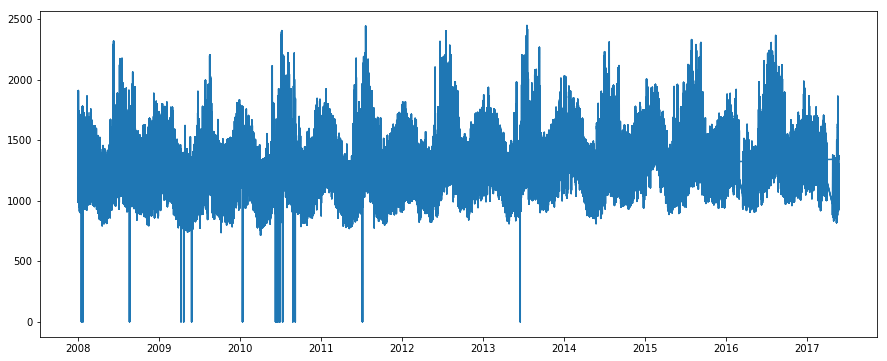

In [11]:
plt.plot(data_capitl)

### From the plot we can make following initial inferences

- `The data has no particular trend`
- `The data has seasonality`

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

C:\Users\sleeba\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
plt.plot(acf(data_capitl, unbiased=False, nlags=40, qstat=False, fft=False, alpha=None, missing='none'))

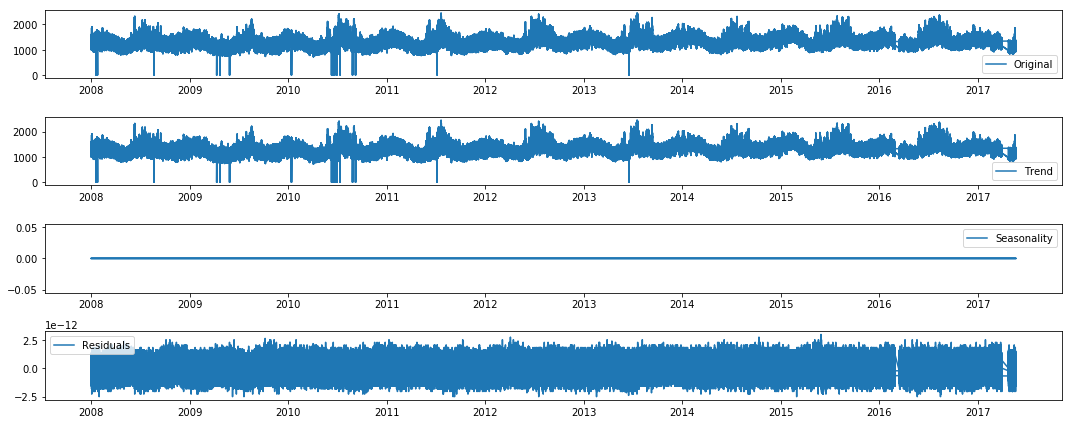

In [19]:
decomposition = seasonal_decompose(data_capitl, model='additive', freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_capitl, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

C:\Users\sleeba\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\sleeba\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\sleeba\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


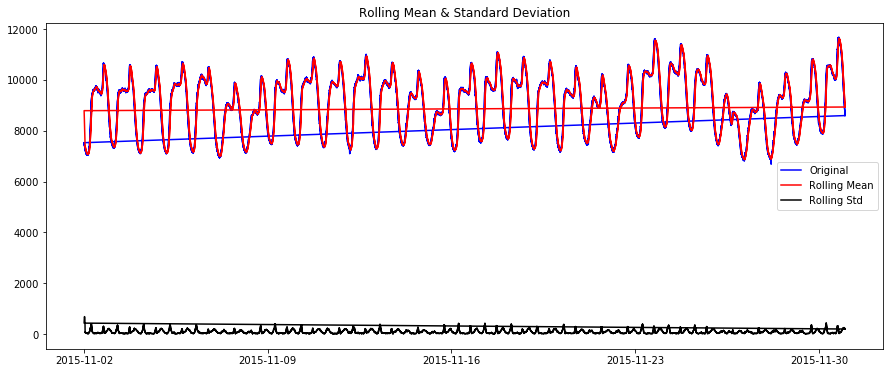

Results of Dickey-Fuller Test:
Test Statistic                -1.581061e+01
p-value                        1.047798e-28
#Lags Used                     3.800000e+01
Number of Observations Used    1.684300e+04
Critical Value (5%)           -2.861712e+00
Critical Value (1%)           -3.430738e+00
Critical Value (10%)          -2.566861e+00
dtype: float64


In [8]:
test_stationarity(data["2015-11"])